In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df = pd.read_csv('train.csv')

In [36]:
df['pet_id'].count()

18834

In [37]:
df['condition'].value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

In [38]:
df['color_type'].value_counts()

Black                4620
White                2453
Brown                1791
Brown Tabby          1687
Tan                  1349
Blue                  852
Orange Tabby          791
Red                   526
Brown Brindle         496
Tricolor              469
Blue Tabby            386
Tortie                366
Calico                343
Gray                  307
Chocolate             259
Torbie                242
Cream Tabby           191
Sable                 167
Cream                 162
Fawn                  159
Yellow                143
Buff                  125
Lynx Point            117
Blue Merle            104
Seal Point             78
Black Brindle          66
Gray Tabby             65
Black Tabby            55
Flame Point            52
Brown Merle            39
Orange                 39
Black Smoke            32
Gold                   31
Tortie Point           26
Silver                 24
Red Tick               23
Blue Tick              21
Blue Point             20
Lilac Point 

In [39]:
len(df['color_type'].value_counts())

56

In [40]:
df['breed_category'].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [41]:
df['pet_category'].value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [42]:
df['issue_date'] = pd.to_datetime(df['issue_date'])

In [43]:
df['issued_year'] = df['issue_date'].apply(lambda item:item.year)

In [44]:
df['issued_month'] = df['issue_date'].apply(lambda item:item.month)

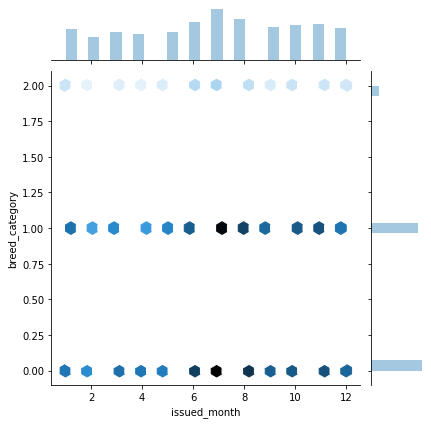

In [45]:
sns.jointplot(x=df['issued_month'],y=df['breed_category'],data=df,kind='hex')

In [46]:
df.drop('issue_date',axis=1,inplace=True)

In [47]:
df['listing_date'] = pd.to_datetime(df['listing_date'])

In [48]:
df['listing_year'] = df['listing_date'].apply(lambda item:item.year)

In [49]:
df['listing_month'] = df['listing_date'].apply(lambda item:item.month)

In [50]:
df.drop('listing_date',axis=1,inplace=True)

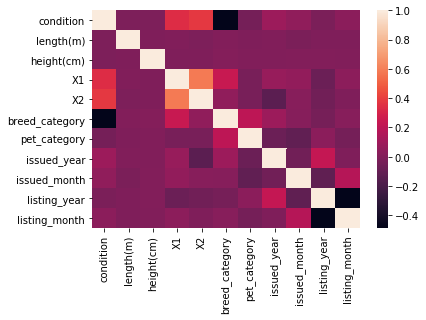

In [51]:
sns.heatmap(df.corr())

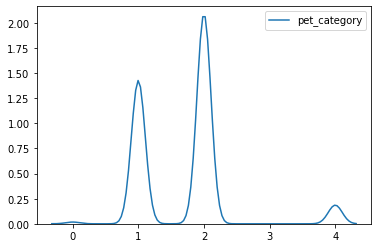

In [52]:
sns.kdeplot(df['pet_category'])

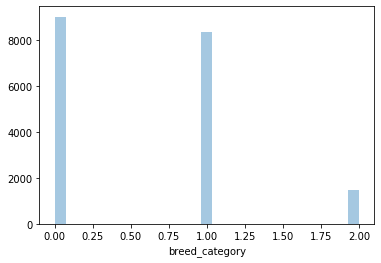

In [53]:
sns.distplot(df['breed_category'],kde=False)

In [54]:
df['height(m)'] = df['height(cm)'].apply(lambda item:item/100)
df.drop('height(cm)',axis=1,inplace=True)

In [63]:
df.head()

,pet_id,condition,color_type,length(m),X1,X2,breed_category,pet_category,issued_year,issued_month,listing_year,listing_month,height(m)
0,69903,2.0,3,0.80,13,9,0.0,1,2016,7,2016,9,0.0778
1,66892,1.0,1,0.72,13,9,0.0,2,2013,11,2018,12,0.1419
2,69750,NaN,2,0.15,15,4,2.0,4,2014,9,2016,10,0.4090
3,71623,1.0,1,0.62,0,1,0.0,2,2016,12,2019,1,0.1782
4,57969,2.0,0,0.50,18,4,0.0,1,2017,9,2017,11,0.1106


In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
from sklearn.impute import KNNImputer

In [58]:
imputer = KNNImputer(n_neighbors=7)

In [59]:
df['pet_id']=df['pet_id'].apply(lambda i:i[5:])

In [60]:
df['color_type'].replace(to_replace=['Black','White','Brown','Brown Tabby','Tan','Blue','Orange Tabby','Red','Brown Brindle','Tricolor','Blue Tabby','Tortie','Calico','Gray','Chocolate','Torbie','Cream Tabby','Sable','Cream','Fawn','Yellow','Buff','Lynx Point','Blue Merle','Seal Point','Black Brindle','Gray Tabby','Black Tabby','Flame Point','Brown Merle','Orange','Black Smoke','Gold','Tortie Point','Silver','Red Tick','Blue Tick','Blue Point','Lilac Point','Silver Tabby','Yellow Brindle','Apricot','Red Merle','Calico Point','Blue Cream','Blue Tiger','Chocolate Point','Pink','Green','Blue Smoke','Silver Lynx Point','Agouti','Brown Tiger','Liver','Black Tiger','Liver Tick'],value=range(56),inplace=True)

In [65]:
df1 = imputer.fit_transform(df)

In [67]:
df2 = pd.DataFrame(df1,columns=df.columns)

In [68]:
df2.head()

,pet_id,condition,color_type,length(m),X1,X2,breed_category,pet_category,issued_year,issued_month,listing_year,listing_month,height(m)
0,69903.0,2.000000,3.0,0.80,13.0,9.0,0.0,1.0,2016.0,7.0,2016.0,9.0,0.0778
1,66892.0,1.000000,1.0,0.72,13.0,9.0,0.0,2.0,2013.0,11.0,2018.0,12.0,0.1419
2,69750.0,0.857143,2.0,0.15,15.0,4.0,2.0,4.0,2014.0,9.0,2016.0,10.0,0.4090
3,71623.0,1.000000,1.0,0.62,0.0,1.0,0.0,2.0,2016.0,12.0,2019.0,1.0,0.1782
4,57969.0,2.000000,0.0,0.50,18.0,4.0,0.0,1.0,2017.0,9.0,2017.0,11.0,0.1106


In [74]:
X = df2.drop(['breed_category','pet_category'],axis=1)

In [75]:
y = df2['breed_category']

In [76]:
X.shape

(18834, 11)

In [77]:
y.shape

(18834,)

In [78]:
model = KNeighborsClassifier()
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [80]:
X_test = pd.read_csv('test.csv')

In [81]:
X_test['issue_date'] = pd.to_datetime(X_test['issue_date'])

In [82]:
X_test['issued_year'] = X_test['issue_date'].apply(lambda i:i.year)
X_test['issued_month'] = X_test['issue_date'].apply(lambda i:i.month)

In [83]:
X_test.drop('issue_date',axis=1,inplace=True)

In [84]:
X_test['listing_date'] = pd.to_datetime(X_test['listing_date'])

In [85]:
X_test['listing_year'] = X_test['listing_date'].apply(lambda i:i.year)
X_test['listing_month'] = X_test['listing_date'].apply(lambda i:i.month)

In [86]:
X_test.drop('listing_date',axis=1,inplace=True)

In [87]:
X_test.head()

,pet_id,condition,color_type,length(m),height(cm),X1,X2,issued_year,issued_month,listing_year,listing_month
0,ANSL_75005,0.0,Black,0.87,42.73,0,7,2005,8,2017,9
1,ANSL_76663,1.0,Orange Tabby,0.06,6.71,0,1,2018,11,2019,5
2,ANSL_58259,1.0,Black,0.24,41.21,0,7,2012,10,2018,4
3,ANSL_67171,1.0,Black,0.29,8.46,7,1,2015,2,2018,4
4,ANSL_72871,1.0,Brown,0.71,30.92,0,7,2017,1,2018,4


In [88]:
X_test['pet_id'] = X_test['pet_id'].apply(lambda i:i[5:])

In [89]:
X_test['height(m)'] = X_test['height(cm)'].apply(lambda i:i/100)

In [90]:
X_test.drop('height(cm)',axis=1,inplace=True)

In [91]:
X_test['color_type'].replace(to_replace=['Black','White','Brown','Brown Tabby','Tan','Blue','Orange Tabby','Red','Brown Brindle','Tricolor','Blue Tabby','Tortie','Calico','Gray','Chocolate','Torbie','Cream Tabby','Sable','Cream','Fawn','Yellow','Buff','Lynx Point','Blue Merle','Seal Point','Black Brindle','Gray Tabby','Black Tabby','Flame Point','Brown Merle','Orange','Black Smoke','Gold','Tortie Point','Silver','Red Tick','Blue Tick','Blue Point','Lilac Point','Silver Tabby','Yellow Brindle','Apricot','Red Merle','Calico Point','Blue Cream','Blue Tiger','Chocolate Point','Pink','Green','Blue Smoke','Silver Lynx Point','Agouti','Brown Tiger','Liver','Black Tiger','Liver Tick'],value=range(56),inplace=True)

In [93]:
X_test1 = imputer.fit_transform(X_test)

In [95]:
X_test2 = pd.DataFrame(X_test1,columns=X_test.columns)

In [96]:
pred = model.predict(X_test2)

In [97]:
pred[0:5]

array([0., 1., 0., 0., 1.])

In [99]:
model1 = KNeighborsClassifier()

In [101]:
y1 = df['pet_category']

In [102]:
model1.fit(X,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [104]:
pred1 = model1.predict(X_test2)

In [105]:
pred1[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [106]:
pred1.shape

(8072,)

In [107]:
pred.shape

(8072,)

In [108]:
X_test['pet_id'] = X_test['pet_id'].apply(lambda i:"ANSL_"+str(i))

In [109]:
sol = pd.DataFrame({'pet_id':X_test['pet_id'],'breed_category':pred,'pet_category':pred1})

In [110]:
sol.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,0.0,2
1,ANSL_76663,1.0,2
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,2
4,ANSL_72871,1.0,2
